# Dados Candidatos SP 2024

Análise dos dados dos candidatos eleitorais das eleições Brasil 2024 para o estado de São Paulo
Dados disponíveis no https://dadosabertos.tse.jus.br/dataset/candidatos-2024
Este é um exercício de dataviz básico usando Pandas e Matplot. Os códigos comentados servem para facilitar a compreensão.

## Introdução

Uma breve análise descritiva da situação eleitoral do Estado de São Paulo considerando todos os candidatos disponíveil nos dados abertos do TSE.
Indepente do exercício é sempre importante quebrar a análise e introduzir os principais pontos.

## Desenvolvimento

No desenvolvimento deste exercício utilizamos os pacotes abaixo:

In [153]:
# IMPORTAR PACOTES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Resumo dos dados

Um gráfico de barras ordenados pelo número de candidatos por partido.
Para mais informações de agrupamento recomendo o seguinte conteúdo: https://realpython.com/pandas-groupby/

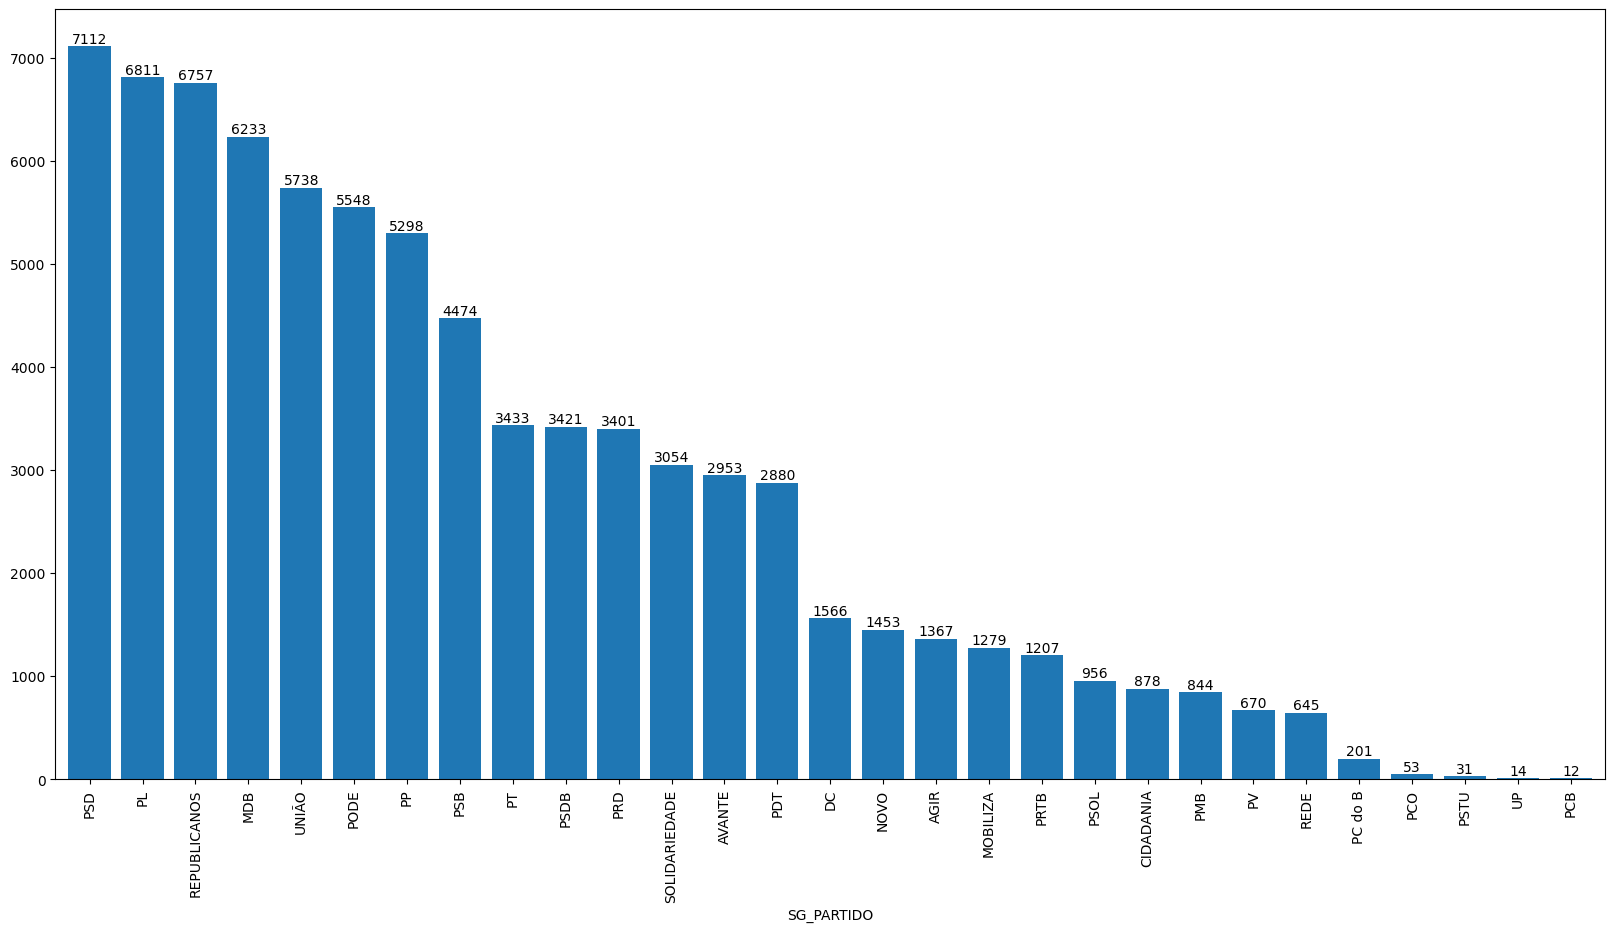

In [154]:
#ABRIR ARQUIVO
df  = pd.read_csv('consulta_cand_2024_SP.csv')

# CRIAR UM AGRUPAMENTO DOS DADOS POR PARTIDO A NÌVEL DO CÓDIGO DO CANDIDATO
df = df.groupby(['SG_PARTIDO'])['SQ_CANDIDATO'].count()

#REORDENANDO OS DADOS
df = df.sort_values(ascending=False)

#PLOTAR O GRÁFICO - PARAMETROS PARA CONFIGURAÇÃO DO GRÁFICO
ax = df.plot.bar(width=0.8,figsize=(20,10))

#GERAR OS LABELS COM OS VALORES ACIMA DAS BARRAS
for container in ax.containers:
    ax.bar_label(container)

### Análise de distribuição de genêro nos partidos do estado

Exemplo descritivo da distribuição de gênero entre partidos.
Neste exemplo usamos um gráfico de barras empilhadas e utilizamos um agrupamento com duas condições: PARTIDO E GÊNERO

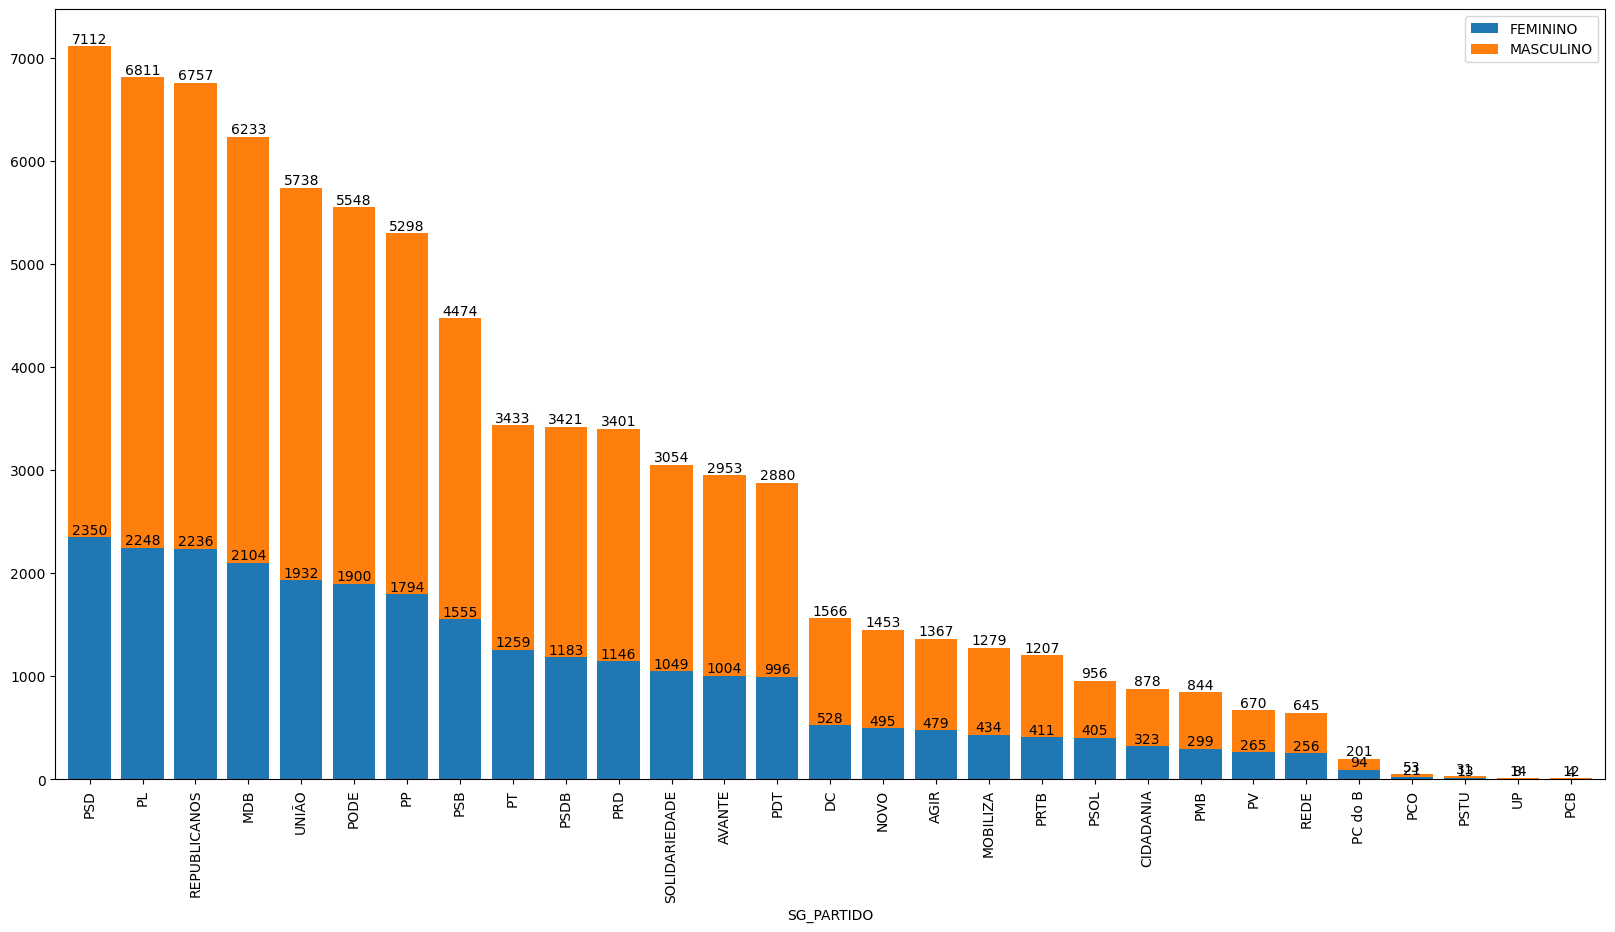

In [155]:
#ABRIR ARQUIVOS - eu abro em toda célula para poder executar individualmente cada bloco
df  = pd.read_csv('consulta_cand_2024_SP.csv')

# CRIAR GRUPO - aqui tem uma detalhe que é o UNSTACK utilizado para pivotear os dados de gênero
df = df.groupby(['SG_PARTIDO', 'DS_GENERO']).size().unstack()

#CRIAR UMA LINHA DE TOTAL PARA ORDENAÇÃO
total = df['FEMININO']+df['MASCULINO']
df = pd.concat([df,total],axis=1,join='inner')
df.columns = ['FEMININO','MASCULINO','TOTAL']

#ORDENAR POR TOTAL
ax = df.sort_values('TOTAL', ascending=False)[['FEMININO','MASCULINO']].plot.bar(stacked=True, width=0.8,figsize=(20,10))

for container in ax.containers:
    ax.bar_label(container)


Por fim criamos um exemplo de plotagem que quebra em dois gráficos a visualização.

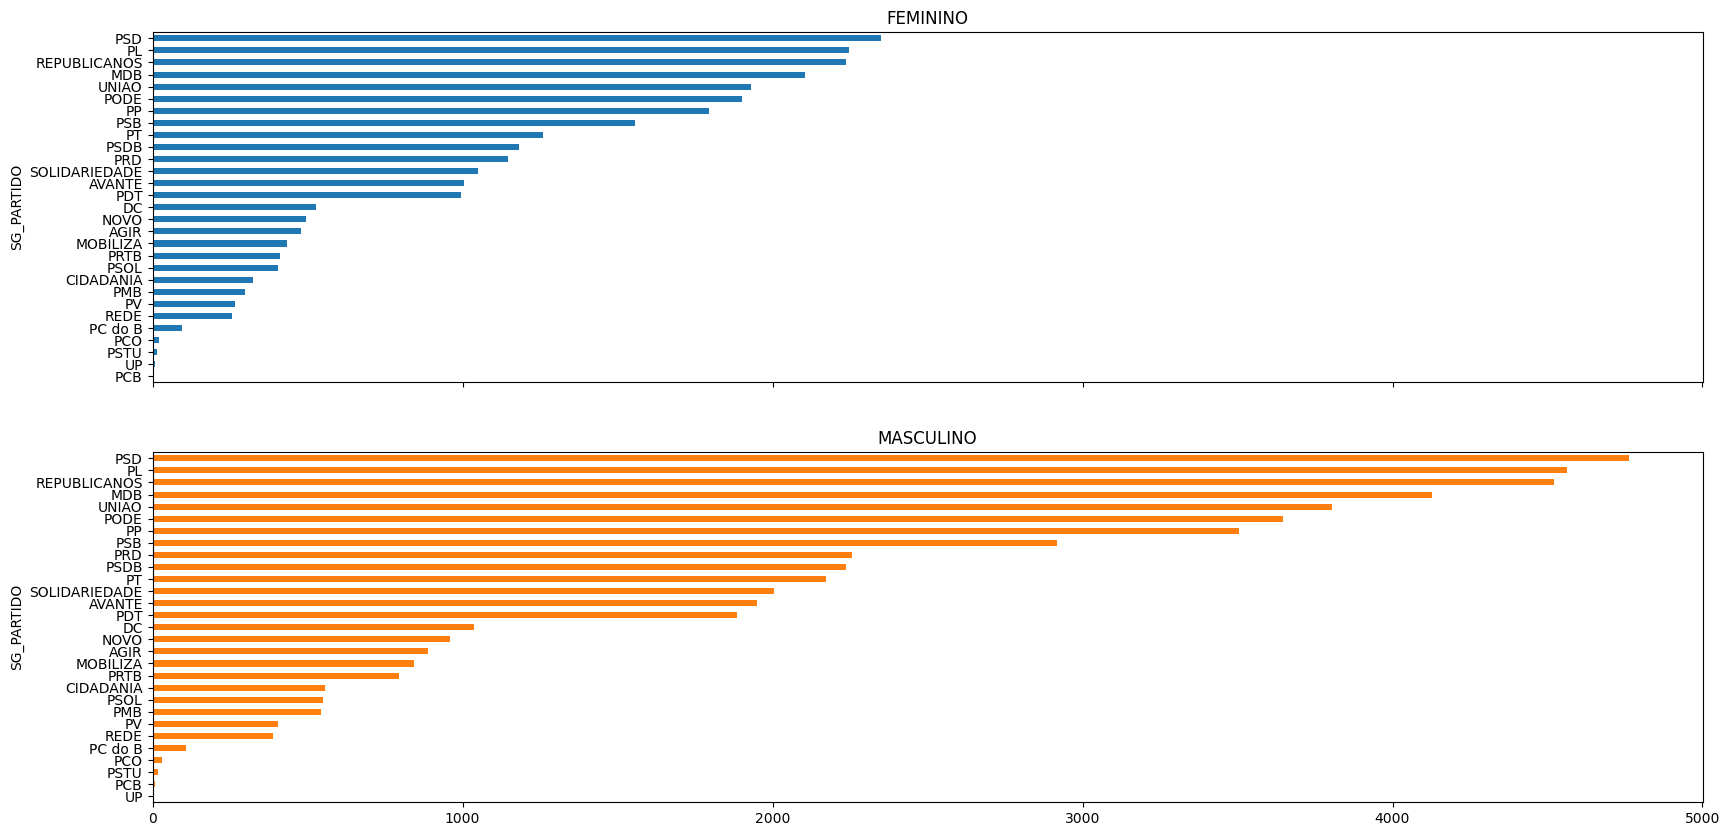

In [156]:
#ABRIR ARQUIVOS
df  = pd.read_csv('consulta_cand_2024_SP.csv')
#CRIAR GRUPO
df = df.groupby(['SG_PARTIDO', 'DS_GENERO']).size().unstack()

#NESTE EXEMPLO USO OS SUBPLOTS PARA QUEBRAR
f, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(20,10), sharex='col')
#to each subplot to have different color
colors = plt.rcParams["axes.prop_cycle"]()
for i, partido in enumerate(chart):
    df[partido].sort_values().plot.barh(title = partido, 
                                       ax = axs[i], 
                                       color = next(colors)["color"],
                                       xlabel = '')